### This assignment has 2 objectives:
1. Create a model that predicts the Survival Months of a Breast Cancer patient (dataset - breast_cancer_smonths.csv)
2. Create a model that predicts the Diagnosis (Malign or Benign) of a Breast Cancer patient (dataset - breast_cancer_diagnosis.csv)

In this file you will elaborate part 1

Write your analysis inside your comments or markdowns.

## Import the relevant libraries

In [80]:
import numpy as np # linear algebra
import pandas as pd # data processing
import statsmodels.api as sm # statistical models
import matplotlib.pyplot as plt # plotting
from sklearn.linear_model import LinearRegression # linear regression
import seaborn as sns # plotting
sns.set() # set seaborn default for plots

## Load the data

In [81]:
raw_data = pd.read_csv('../Data/breast_cancer_smonths.csv')
raw_data.head()

,Age,Race,Marital Status,TStage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


## Preprocessing

Consider all steps of preprocessing, but if you don't need to preprocess your data, comment with your reasons

In [82]:
raw_data.describe(include='all') # descriptive statistics

,Age,Race,Marital Status,TStage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
count,4024.00,4024,4024,4024,4024,4024,4024,4024,4024,4024.00,4024,4024,4024.00,4024.00,4024.00,4024
unique,NaN,3,5,4,3,5,4,4,2,NaN,2,2,NaN,NaN,NaN,2
top,NaN,White,Married,T2,N1,IIA,Moderately differentiated,2,Regional,NaN,Positive,Positive,NaN,NaN,NaN,Alive
freq,NaN,3413,2643,1786,2732,1305,2351,2351,3932,NaN,3755,3326,NaN,NaN,NaN,3408
mean,53.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.47,NaN,NaN,14.36,4.16,71.30,NaN
std,8.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.12,NaN,NaN,8.10,5.11,22.92,NaN
min,30.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,1.00,1.00,1.00,NaN
25%,47.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.00,NaN,NaN,9.00,1.00,56.00,NaN
50%,54.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.00,NaN,NaN,14.00,2.00,73.00,NaN
75%,61.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.00,NaN,NaN,19.00,5.00,90.00,NaN


In [83]:
data = raw_data.drop(['Race'], axis=1) # drop survival months because it is not a feature
data.describe(include='all') # descriptive statistics

,Age,Marital Status,TStage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
count,4024.00,4024,4024,4024,4024,4024,4024,4024,4024.00,4024,4024,4024.00,4024.00,4024.00,4024
unique,NaN,5,4,3,5,4,4,2,NaN,2,2,NaN,NaN,NaN,2
top,NaN,Married,T2,N1,IIA,Moderately differentiated,2,Regional,NaN,Positive,Positive,NaN,NaN,NaN,Alive
freq,NaN,2643,1786,2732,1305,2351,2351,3932,NaN,3755,3326,NaN,NaN,NaN,3408
mean,53.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.47,NaN,NaN,14.36,4.16,71.30,NaN
std,8.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.12,NaN,NaN,8.10,5.11,22.92,NaN
min,30.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,1.00,1.00,1.00,NaN
25%,47.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.00,NaN,NaN,9.00,1.00,56.00,NaN
50%,54.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.00,NaN,NaN,14.00,2.00,73.00,NaN
75%,61.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.00,NaN,NaN,19.00,5.00,90.00,NaN


In [84]:
data.isnull().sum() # check for missing values

Age                       0
Marital Status            0
TStage                    0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

### Exploring the PDFs

C:\Users\student\AppData\Local\Temp\ipykernel_13372\3203464482.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data['Survival Months']) # plot age distribution


<Axes: xlabel='Survival Months', ylabel='Density'>

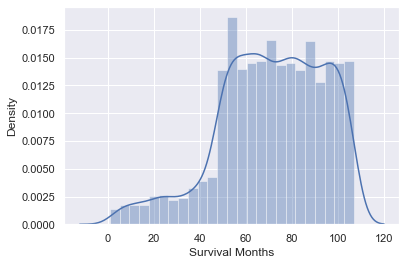

In [85]:
sns.distplot(raw_data['Survival Months']) # plot age distribution

### Dealing with outliers

If you decide not to deal with the outliers, comment your reasons

In [86]:
q = raw_data['Survival Months'].quantile(0.1) # remove top 1% of outliers
data_1 = raw_data[raw_data['Survival Months']>q] 
data_1.describe(include='all')

,Age,Race,Marital Status,TStage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
count,3607.00,3607,3607,3607,3607,3607,3607,3607,3607,3607.00,3607,3607,3607.00,3607.00,3607.00,3607
unique,NaN,3,5,4,3,5,4,4,2,NaN,2,2,NaN,NaN,NaN,2
top,NaN,White,Married,T2,N1,IIA,Moderately differentiated,2,Regional,NaN,Positive,Positive,NaN,NaN,NaN,Alive
freq,NaN,3071,2396,1577,2534,1231,2145,2145,3541,NaN,3432,3062,NaN,NaN,NaN,3302
mean,54.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.71,NaN,NaN,14.25,3.85,76.51,NaN
std,8.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.63,NaN,NaN,8.06,4.74,17.50,NaN
min,30.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,1.00,1.00,45.00,NaN
25%,47.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.00,NaN,NaN,9.00,1.00,61.00,NaN
50%,54.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.00,NaN,NaN,14.00,2.00,76.00,NaN
75%,61.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.00,NaN,NaN,19.00,4.00,92.00,NaN


C:\Users\student\AppData\Local\Temp\ipykernel_13372\1995523647.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['Survival Months']) # plot age distribution


<Axes: xlabel='Survival Months', ylabel='Density'>

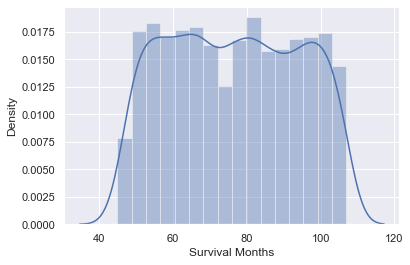

In [87]:
sns.distplot(data_1['Survival Months']) # plot age distribution

C:\Users\student\AppData\Local\Temp\ipykernel_13372\1475308218.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data['Tumor Size'])


<Axes: xlabel='Tumor Size', ylabel='Density'>

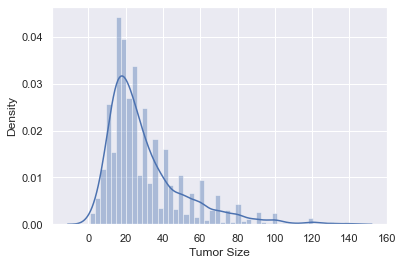

In [88]:
sns.distplot(raw_data['Tumor Size'])

In [89]:
q = raw_data['Tumor Size'].quantile(0.99) # remove top 1% of outliers
data_2 = raw_data[raw_data['Tumor Size']<q]
data_2.describe(include='all')


,Age,Race,Marital Status,TStage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
count,3983.00,3983,3983,3983,3983,3983,3983,3983,3983,3983.00,3983,3983,3983.00,3983.00,3983.00,3983
unique,NaN,3,5,4,3,5,4,4,2,NaN,2,2,NaN,NaN,NaN,2
top,NaN,White,Married,T2,N1,IIA,Moderately differentiated,2,Regional,NaN,Positive,Positive,NaN,NaN,NaN,Alive
freq,NaN,3378,2615,1786,2722,1305,2329,2329,3896,NaN,3720,3292,NaN,NaN,NaN,3379
mean,53.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.55,NaN,NaN,14.34,4.12,71.38,NaN
std,8.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.11,NaN,NaN,8.09,5.10,22.92,NaN
min,30.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,1.00,1.00,1.00,NaN
25%,47.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.00,NaN,NaN,9.00,1.00,56.00,NaN
50%,54.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.00,NaN,NaN,14.00,2.00,73.00,NaN
75%,61.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.00,NaN,NaN,19.00,5.00,90.00,NaN


C:\Users\student\AppData\Local\Temp\ipykernel_13372\2191745753.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data['Regional Node Examined'])


<Axes: xlabel='Regional Node Examined', ylabel='Density'>

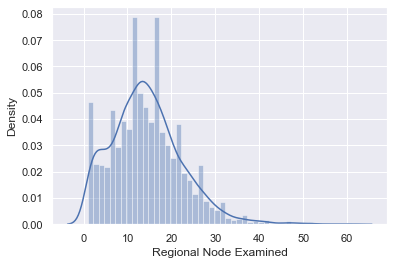

In [90]:
sns.distplot(raw_data['Regional Node Examined'])

C:\Users\student\AppData\Local\Temp\ipykernel_13372\1212030849.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3['Regional Node Examined'])# plot age distribution


<Axes: xlabel='Regional Node Examined', ylabel='Density'>

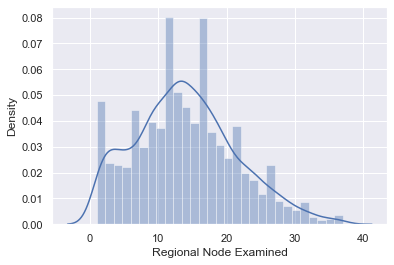

In [91]:

q = data_2['Regional Node Examined'].quantile(0.99) # remove top 1% of outliers
data_3 = data_2[data_2['Regional Node Examined']<q]
sns.distplot(data_3['Regional Node Examined'])# plot age distribution

C:\Users\student\AppData\Local\Temp\ipykernel_13372\1413544340.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data['Reginol Node Positive'])


<Axes: xlabel='Reginol Node Positive', ylabel='Density'>

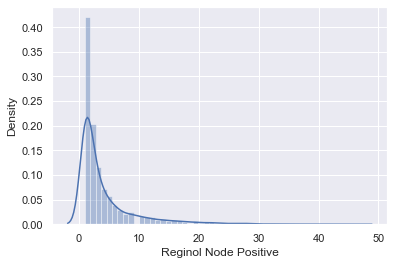

In [92]:
sns.distplot(raw_data['Reginol Node Positive'])



C:\Users\student\AppData\Local\Temp\ipykernel_13372\2193501493.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_4['Reginol Node Positive'])


<Axes: xlabel='Reginol Node Positive', ylabel='Density'>

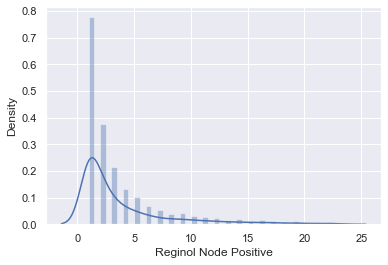

In [93]:
q = data_3['Reginol Node Positive'].quantile(0.99) # remove top 1% of outliers
data_4 = data_3[data_3['Reginol Node Positive']<q]
sns.distplot(data_4['Reginol Node Positive'])

C:\Users\student\AppData\Local\Temp\ipykernel_13372\2369872855.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

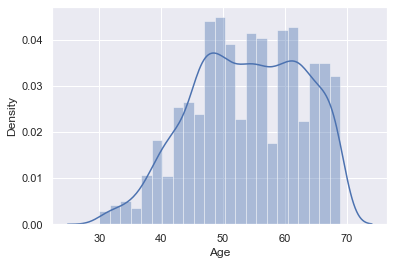

In [94]:
sns.distplot(raw_data['Age'])


C:\Users\student\AppData\Local\Temp\ipykernel_13372\345487162.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_5['Age'])


<Axes: xlabel='Age', ylabel='Density'>

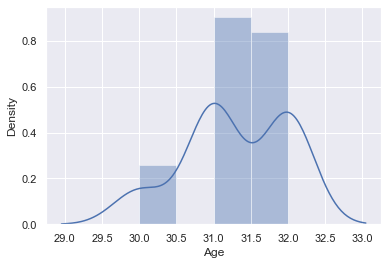

In [95]:
q = data_4['Age'].quantile(0.01) # remove top 1% of outliers
data_5 = data_4[data_4['Age']<q]
sns.distplot(data_5['Age'])

In [96]:
data_cleaned = data_5.reset_index(drop=True) # reset index
data_cleaned.describe(include='all') # descriptive statistics

,Age,Race,Marital Status,TStage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
count,31.00,31,31,31,31,31,31,31,31,31.00,31,31,31.00,31.00,31.00,31
unique,NaN,3,3,3,3,4,3,3,1,NaN,2,2,NaN,NaN,NaN,2
top,NaN,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,NaN,Positive,Positive,NaN,NaN,NaN,Alive
freq,NaN,20,18,14,22,11,16,16,31,NaN,28,22,NaN,NaN,NaN,24
mean,31.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.74,NaN,NaN,15.29,4.29,62.61,NaN
std,0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.05,NaN,NaN,5.56,4.78,25.19,NaN
min,30.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.00,NaN,NaN,3.00,1.00,5.00,NaN
25%,31.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.50,NaN,NaN,13.00,1.00,53.00,NaN
50%,31.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.00,NaN,NaN,15.00,3.00,69.00,NaN
75%,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.00,NaN,NaN,17.50,5.00,79.00,NaN


## Checking OLS 

Linearity, No endogeneity, Normality and homoscedasticity, No autocorrelation and No multicolinearity.
Explain your findings and fixings

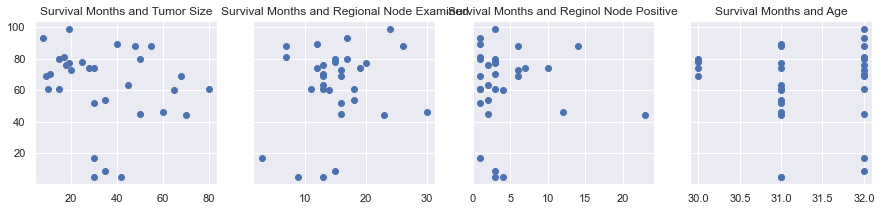

In [97]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Tumor Size'], data_cleaned['Survival Months'])
ax1.set_title('Survival Months and Tumor Size')
ax2.scatter(data_cleaned['Regional Node Examined'],data_cleaned['Survival Months'])
ax2.set_title('Survival Months and Regional Node Examined')
ax3.scatter(data_cleaned['Reginol Node Positive'],data_cleaned['Survival Months'])
ax3.set_title('Survival Months and Reginol Node Positive')
ax4.scatter(data_cleaned['Age'],data_cleaned['Survival Months'])
ax4.set_title('Survival Months and Age')

plt.show()




C:\Users\student\AppData\Local\Temp\ipykernel_13372\4067357485.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned['Survival Months'])


<Axes: xlabel='Survival Months', ylabel='Density'>

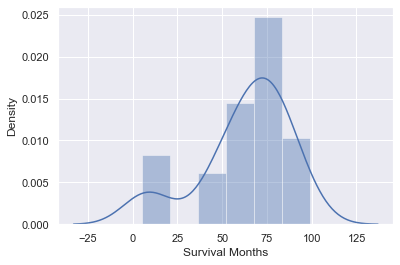

In [98]:
sns.distplot(data_cleaned['Survival Months'])

### Relaxing the assumptions

In [99]:
log_Survival = np.log(data_cleaned['Survival Months']) # log transformation
data_cleaned['log_Survival'] = log_Survival # add log transformation to data
data_cleaned # check data


,Age,Race,Marital Status,TStage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,log_Survival
0,31,White,Married,T3,N3,IIIC,Poorly differentiated,3,Regional,70,Positive,Positive,23,23,44,Dead,3.78
1,31,Black,Married,T2,N1,IIB,Poorly differentiated,3,Regional,30,Positive,Positive,16,1,52,Alive,3.95
2,32,White,Single,T3,N2,IIIA,Poorly differentiated,3,Regional,68,Positive,Negative,13,6,69,Alive,4.23
3,32,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,35,Positive,Negative,15,3,9,Alive,2.20
4,30,White,Single,T2,N2,IIIA,Moderately differentiated,2,Regional,28,Positive,Positive,19,7,74,Alive,4.30
5,32,Other,Married,T1,N1,IIA,Well differentiated,1,Regional,11,Positive,Positive,13,3,70,Alive,4.25
6,31,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,40,Positive,Positive,12,1,89,Alive,4.49
7,31,Other,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,35,Positive,Positive,18,2,54,Dead,3.99
8,31,Other,Single,T1,N1,IIA,Moderately differentiated,2,Regional,19,Positive,Positive,20,3,77,Alive,4.34
9,32,White,Single,T2,N1,IIB,Poorly differentiated,3,Regional,30,Negative,Negative,3,1,17,Dead,2.83


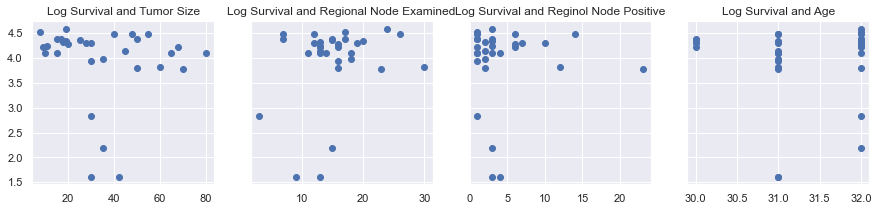

In [100]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize =(15,3)) # plot log transformation
ax1.scatter(data_cleaned['Tumor Size'], data_cleaned['log_Survival'])
ax1.set_title('Log Survival and Tumor Size')
ax2.scatter(data_cleaned['Regional Node Examined'],data_cleaned['log_Survival'])
ax2.set_title('Log Survival and Regional Node Examined')
ax3.scatter(data_cleaned['Reginol Node Positive'],data_cleaned['log_Survival'])
ax3.set_title('Log Survival and Reginol Node Positive')
ax4.scatter(data_cleaned['Age'],data_cleaned['log_Survival'])
ax4.set_title('Log Survival and Age')

plt.show()

Multicollinearity

In [101]:
data_cleaned.columns.values # check columns

array(['Age', 'Race', 'Marital Status', 'TStage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size',
       'Estrogen Status', 'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status',
       'log_Survival'], dtype=object)

## Map the data / or... create dummy variables

use pandas get.dummies for mapping the data

Obs: You might need or not drop more features after the dummies depending on their VIF

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Tumor Size','Regional Node Examined','Reginol Node Positive','Age']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif



,VIF,Features
0,5.16,Tumor Size
1,11.97,Regional Node Examined
2,3.14,Reginol Node Positive
3,12.32,Age


In [103]:
data_no_multicollinearity = data_cleaned.drop(['Age'], axis=1)

In [104]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)
data_with_dummies.head()

,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,log_Survival,Race_Other,Race_White,Marital Status_Married,Marital Status_Single,TStage _T2,...,6th Stage_IIB,6th Stage_IIIA,6th Stage_IIIC,differentiate_Poorly differentiated,differentiate_Well differentiated,Grade_2,Grade_3,Estrogen Status_Positive,Progesterone Status_Positive,Status_Dead
0,70,23,23,44,3.78,False,True,True,False,False,...,False,False,True,True,False,False,True,True,True,True
1,30,16,1,52,3.95,False,False,True,False,True,...,True,False,False,True,False,False,True,True,True,False
2,68,13,6,69,4.23,False,True,False,True,False,...,False,True,False,True,False,False,True,True,False,False
3,35,15,3,9,2.20,False,True,True,False,True,...,True,False,False,False,False,True,False,True,False,False
4,28,19,7,74,4.30,False,True,False,True,True,...,False,True,False,False,False,True,False,True,True,False


In [105]:
data_with_dummies.columns.values

array(['Tumor Size', 'Regional Node Examined', 'Reginol Node Positive',
       'Survival Months', 'log_Survival', 'Race_Other', 'Race_White',
       'Marital Status_Married', 'Marital Status_Single ', 'TStage _T2',
       'TStage _T3', 'N Stage_N2', 'N Stage_N3', '6th Stage_IIB',
       '6th Stage_IIIA', '6th Stage_IIIC',
       'differentiate_Poorly differentiated',
       'differentiate_Well differentiated', 'Grade_2', 'Grade_3',
       'Estrogen Status_Positive', 'Progesterone Status_Positive',
       'Status_Dead'], dtype=object)

In [106]:
cols = ['Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'log_Survival']

In [107]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,Tumor Size,Regional Node Examined,Reginol Node Positive,log_Survival
0,70,23,23,3.78
1,30,16,1,3.95
2,68,13,6,4.23
3,35,15,3,2.20
4,28,19,7,4.30


## Linear regression model using Sklearn

### Declare the inputs and the targets

In [108]:
targets = data_preprocessed['log_Survival'] # define targets (dependent variable)
inputs = data_preprocessed.drop(['log_Survival'],axis=1) # define inputs 

### Scale the data
Feature scaling is a method used to normalize the range of independent variables or features of data.
The range of all features should be normalized so that each feature contributes approximately proportionately to the final target.

Only scale the data if you think you need to

In [109]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)


StandardScaler()

In [110]:
inputs_scaled = scaler.transform(inputs) # scale inputs

### Split the data (train/test)


In [111]:
from sklearn.model_selection import train_test_split # split data into train and test
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365) # split data into train and test

### Regression

In [112]:
reg = LinearRegression() # create linear regression object
reg.fit(x_train,y_train) # fit linear regression model  

LinearRegression()

In [113]:
y_hat = reg.predict(x_train) # create predictions

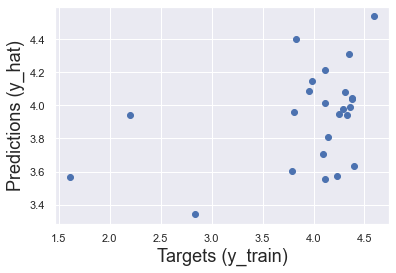

In [114]:
plt.scatter(y_train, y_hat) # plot predictions against targets
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

plt.show()

C:\Users\student\AppData\Local\Temp\ipykernel_13372\2625657090.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_hat) # plot residuals


Text(0.5, 1.0, 'Residuals PDF')

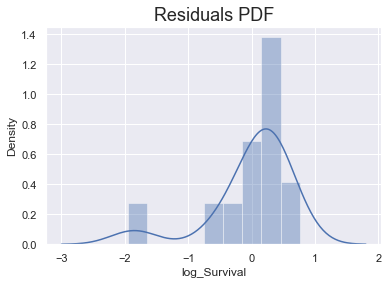

In [115]:
sns.distplot(y_train - y_hat) # plot residuals
plt.title("Residuals PDF", size=18)


In [116]:
reg.score(x_train,y_train) # R-squared

0.16410503128943377

In [117]:
reg.intercept_ # intercept

3.9207514769000347

In [118]:
reg.coef_ # coefficients

array([-0.09693178,  0.31286425, -0.14624184])

In [119]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features']) # create summary table
reg_summary['Weights'] = reg.coef_ # add coefficients
reg_summary

,Features,Weights
0,Tumor Size,-0.10
1,Regional Node Examined,0.31
2,Reginol Node Positive,-0.15


In [120]:
data_cleaned['Age'].unique() # check unique values

array([31, 32, 30], dtype=int64)

### Testing

In [121]:
y_hat_test = reg.predict(x_test) # create predictions

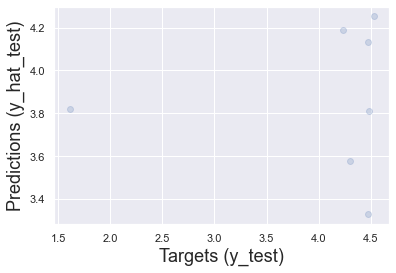

In [122]:
plt.scatter(y_test, y_hat_test, alpha=0.2) # plot predictions against targets
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

### Prediction

In [123]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction']) # convert log survival to survival months
df_pf.head()

,Prediction
0,45.70
1,62.30
2,45.11
3,27.88
4,70.28


In [124]:
df_pf['Target'] = np.exp(y_test) # add targets
df_pf

,Prediction,Target
0,45.70,NaN
1,62.30,NaN
2,45.11,NaN
3,27.88,NaN
4,70.28,NaN
5,35.80,NaN
6,66.04,89.00


In [125]:
y_test = y_test.reset_index(drop=True) # reset index
y_test.head() # check targets

0   1.61
1   4.48
2   4.49
3   4.48
4   4.53
Name: log_Survival, dtype: float64

In [126]:
df_pf['Target'] = np.exp(y_test) # add targets
df_pf

,Prediction,Target
0,45.70,5.00
1,62.30,88.00
2,45.11,89.00
3,27.88,88.00
4,70.28,93.00
5,35.80,74.00
6,66.04,69.00


In [127]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction'] # calculate residuals

In [128]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100) # calculate difference percentage
df_pf

,Prediction,Target,Residual,Difference%
0,45.70,5.00,-40.70,813.92
1,62.30,88.00,25.70,29.21
2,45.11,89.00,43.89,49.32
3,27.88,88.00,60.12,68.32
4,70.28,93.00,22.72,24.43
5,35.80,74.00,38.20,51.62
6,66.04,69.00,2.96,4.29


In [129]:
df_pf.describe() # descriptive statistics

,Prediction,Target,Residual,Difference%
count,7.00,7.00,7.00,7.00
mean,50.44,72.29,21.84,148.73
std,16.08,30.94,32.92,294.07
min,27.88,5.00,-40.70,4.29
25%,40.45,71.50,12.84,26.82
50%,45.70,88.00,25.70,49.32
75%,64.17,88.50,41.05,59.97
max,70.28,93.00,60.12,813.92


In [130]:
pd.options.display.max_rows = 999 # display all rows
pd.set_option('display.float_format', lambda x: '%.2f' % x) # format floats
df_pf.sort_values(by=['Difference%']) # sort by difference percentage


,Prediction,Target,Residual,Difference%
6,66.04,69.00,2.96,4.29
4,70.28,93.00,22.72,24.43
1,62.30,88.00,25.70,29.21
2,45.11,89.00,43.89,49.32
5,35.80,74.00,38.20,51.62
3,27.88,88.00,60.12,68.32
0,45.70,5.00,-40.70,813.92


### Conclusion

Conclusion: The model is not good enough. We need to improve the model.
 Model improvement:
1. More data 
2. More features because we only have 4 features
3. Different model because linear regression is not the best model for this data
4. Our Servival Months model is not good enough. We need to improve it.